# Calibration
---------------------------------

This example shows how to calibrate a classifier through atom.

The data used is a variation on the Australian weather dataset from [https://www.kaggle.com/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look at the data
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Run the pipeline

In [3]:
# Initialize the ATOM class
atom = ATOMClassifier(X, "RainTomorrow", n_rows=1e4, verbose=1, warnings="ignore", random_state=1)
atom.clean()

# Handle missing values and categorical columns in the dataset
atom.impute(strat_num="median", strat_cat="most_frequent")
atom.encode(strategy="target", max_onehot=5, frac_to_other=0.05)

# Fit a linear SVM to the data
atom.run("lsvm")

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (10000, 22)
Scaled: False
Missing values: 22613 (10.28%)
Categorical columns: 5 (22.73%)
Duplicate samples: 2 (0.02%)
-------------------------------------
Train set size: 8000
Test set size: 2000

Applying data cleaning...
Fitting Imputer...
Imputing missing values...
Fitting Encoder...
Encoding categorical columns...

Training ===================================== >>
Models: lSVM
Metric: f1


Results for Linear-SVM:         
Fit ---------------------------------------------
Train evaluation --> f1: 0.5634
Test evaluation --> f1: 0.5898
Time elapsed: 0.462s
-------------------------------------------------
Total time: 0.462s


Final results ========================= >>
Duration: 0.462s
------------------------------------------
Linear-SVM --> f1: 0.5898


## Analyze the results

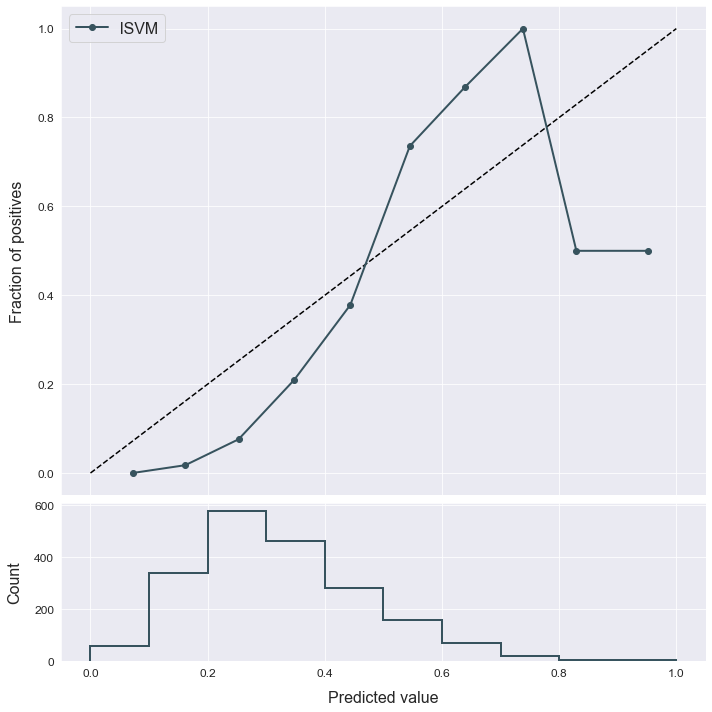

In [4]:
# Check our model's calibration
atom.plot_calibration()

Model lSVM successfully calibrated!


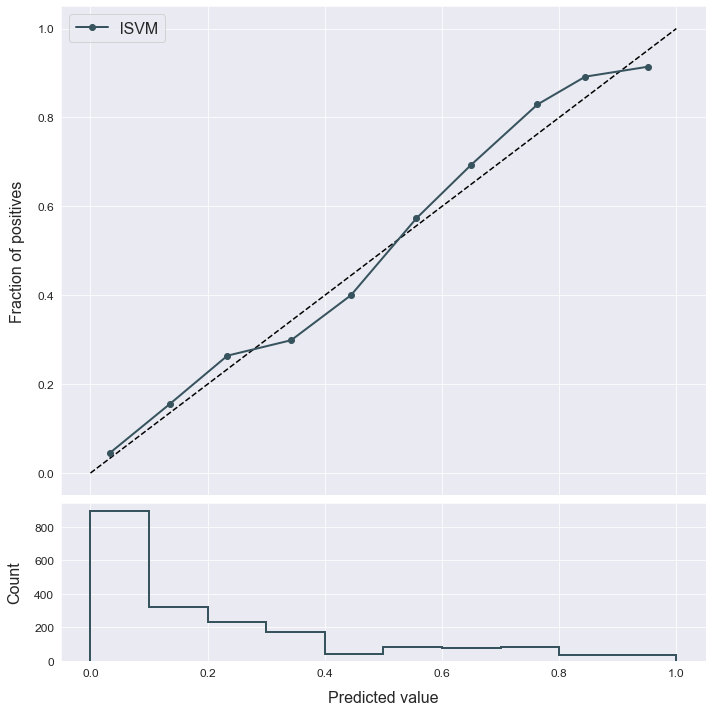

In [5]:
# Let's try to improve it using the calibrate method
atom.calibrate(method="isotonic", cv=5)
atom.plot_calibration()